# Prétraitement du jeu de données

In [1]:
# Importons les bibliothèques pandas,numpy et chargeons le jeu de données
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\TOSHIBA\Dak_gomycode\titanic-passengers.csv", sep= ";")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
# Affichons les 5 prémières lignes du jeu de données
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Nettoyage du jeu de données

In [3]:
# Vérifions les valeurs manquantes dans le jeu de données
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Remplaçons les valeurs manquantes

In [4]:
# Remplaçons les valeurs manquantes dans la colonne "Age" par la médiane
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Remplaçons les valeurs manquantes dans la colonne "Cabin" par "Unknown"
df['Cabin'].fillna('Unknown', inplace=True)

# Supprimons les lignes avec des valeurs manquantes dans la colonne "Embarked"
df.dropna(subset=['Embarked'], inplace=True)

# Conversion des données catégorielles en données numériques

In [ ]:
# Convertion des variables catégorielles en variables binaires numériques
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# Sélection des variables pertinentes

In [6]:
# Sélectionnons les variables pertinentes pour notre analyse
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

In [7]:
# Supprimons les colonnes les moins importantes tels que "PassengerId", "Name" et "Ticket"
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Divisons les données en ensembles d'entraînement et de test

In [8]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# construisons le modèle de régression logistique

In [9]:
from sklearn.linear_model import LogisticRegression

# Créons une instance de la classe LogisticRegression
logreg = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = logreg.predict(X_test)


C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Utilisons une matrice de confusion pour valider le modèle. 

In [10]:
#La précision pour mesurer la proportion de prédictions correctes parmi toutes les prédictions
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7808988764044944

In [13]:
#La matrice de confusion montre le nombre de prédictions correctes et incorrectes pour chaque classe
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[91, 15],
       [24, 48]], dtype=int64)

In [14]:
#La précision, le rappel et le score F1

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.79      0.86      0.82       106
         Yes       0.76      0.67      0.71        72

    accuracy                           0.78       178
   macro avg       0.78      0.76      0.77       178
weighted avg       0.78      0.78      0.78       178



La précision mesure la proportion de vrais positifs parmi les prédictions positives, le rappel mesure la proportion de vrais positifs parmi les vrais positifs et les faux négatifs, et le score F1 est la moyenne harmonique de la précision et du rappel

# ROC/AUC

La courbe ROC est une représentation graphique de la performance d'un modèle de classification. Elle montre le taux de vrais positifs par rapport au taux de faux positifs pour différents seuils de probabilité. L'aire sous la courbe (AUC) mesure la capacité du modèle à distinguer les classes. 

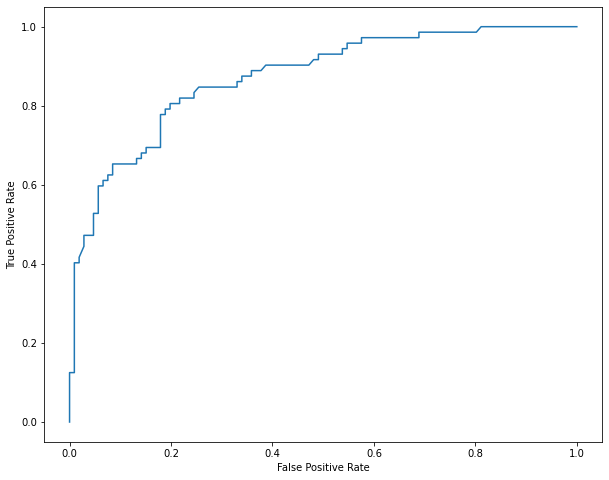

0.8718553459119497

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Créer un encodeur de labels
le = LabelEncoder()

# Encoder les étiquettes de classe en 0 et 1
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Calculons la probabilité des prédictions pour la classe positive
y_prob = logreg.predict_proba(X_test)[:,1]

# Calculons le taux de vrais positifs et le taux de faux positifs pour différents seuils
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Affichons la courbe ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Calculons l'aire sous la courbe ROC
roc_auc_score(y_test, y_prob)

Un AUC de 1,0 indique une capacité parfaite à distinguer les classes, tandis qu'un AUC de 0,5 indique une capacité nulle à distinguer les classes